C:\Users\dhans\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8838 - loss: 0.4016
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9762 - loss: 0.0762
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9854 - loss: 0.0477
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9899 - loss: 0.0327
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9913 - loss: 0.0270
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0.0623
Test accuracy: 0.9840
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


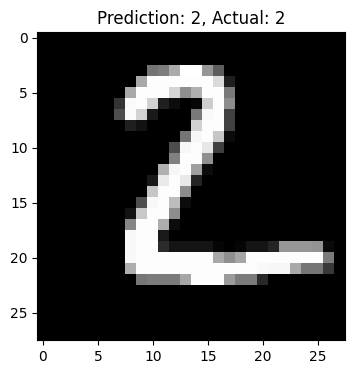

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Build model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Make a prediction (example)
import numpy as np
import matplotlib.pyplot as plt

# Get a sample image
sample_idx = 1
sample_image = test_images[sample_idx:sample_idx+1]
sample_label = test_labels[sample_idx]

# Predict
prediction = model.predict(sample_image)
predicted_digit = np.argmax(prediction[0])

# Display
plt.figure(figsize=(4, 4))
plt.imshow(test_images[sample_idx].reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {predicted_digit}, Actual: {sample_label}")
plt.show()

# Save model (optional)
model.save('mnist_basic_model.h5')